In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [105]:
movies=pd.read_csv(r"C:/Users/Baptiste/Desktop/projet_3/moviz/ml-latest/movies.csv")
ratings=pd.read_csv(r"C:/Users/Baptiste/Desktop/projet_3/moviz/ml-latest/ratings.csv")
genome_score=pd.read_csv(r"C:/Users/Baptiste/Desktop/projet_3/moviz/ml-latest/genome-scores.csv")

In [106]:
moviesC=movies.copy()

In [107]:
# Les genre sont dans une liste, séparés par des |.
# On les splot pour les mettre dans des listes.

movies.genres=movies["genres"].apply(lambda x:x.split("|"))

In [108]:
movies

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
58093,193876,The Great Glinka (1946),[(no genres listed)]
58094,193878,Les tribulations d'une caissière (2011),[Comedy]
58095,193880,Her Name Was Mumu (2016),[Drama]
58096,193882,Flora (2017),"[Adventure, Drama, Horror, Sci-Fi]"


In [109]:
# On explode pour avoir une ligne par film et par genre.
# Puis on utilise get_dummies pour créer une colonne par genre.
# Ensuite on somme par film pour avoir une ligne par film avec un 1 si le film a un genre, et 0 sinon.

movies2=movies.explode("genres")
dummies_genres=pd.concat([movies2["movieId"],movies2["genres"].str.get_dummies()],axis=1).groupby(by="movieId",as_index=False).sum()

In [110]:
dummies_genres

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,193876,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58094,193878,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58095,193880,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58096,193882,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [111]:
# On ajoute les titres et les Id a dummies_genre.

movies3=pd.concat([dummies_genres.movieId,movies.title,dummies_genres.drop(columns="movieId")],axis=1)

In [112]:
movies3

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,193876,The Great Glinka (1946),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58094,193878,Les tribulations d'une caissière (2011),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
58095,193880,Her Name Was Mumu (2016),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58096,193882,Flora (2017),0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [113]:
# Cette fonction renvoit l'année qui est spécifiée en parenthese a la fin du titre.

def getyear(string):
    result=re.search(r'\(\d{4}\)',string)
    if result:
        out=result.group().strip("(").strip(")")
        return out
    return 1800

In [114]:
# On crée une nouvelle colonne year avec getyear.

movies3["year"]=movies3.title.apply(getyear)

In [115]:
# On convertit les années en int.

movies3.year=movies3.year.astype(int)

In [116]:
ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [117]:
# On utilise pas timestamp, on la drop.

ratings.drop(columns="timestamp",inplace=True)

In [118]:
# On crée une colonne dans movies avec la note moyenne du film.

movies3["av_rating"]=ratings.groupby(by="movieId",as_index=False).mean().rating

In [119]:
# On crée une colonne dans movies avec le nombre de notes.

movies3["count_ratings"]=ratings.groupby(by="movieId",as_index=False).count().rating
movies3.count_ratings.fillna(0,inplace=True)

In [120]:
movies3

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,av_rating,count_ratings
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1995,3.886649,68469.0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1995,3.246583,27143.0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1995,3.173981,15585.0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1995,2.874540,2989.0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1995,3.077291,15474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,193876,The Great Glinka (1946),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1946,NaN,0.0
58094,193878,Les tribulations d'une caissière (2011),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2011,NaN,0.0
58095,193880,Her Name Was Mumu (2016),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,NaN,0.0
58096,193882,Flora (2017),0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2017,NaN,0.0


In [121]:
# On recrée temporairement une colonne genre avec les valeurs de toutes les autres colonnes.

movies3["genre"]=movies3.drop(columns=["movieId","title","year","av_rating","count_ratings"]).values.tolist()

movies3.genre=movies3.genre.apply(lambda x:tuple(x))

In [122]:
# Pour les films qui n'ont pas de notes, 
#on leur donne la note médiane de tous les films qui ont exactement les mêmes genres.

movies3.av_rating.fillna(movies3.groupby(by="genre")["av_rating"].transform("median"),inplace=True)

In [123]:
# Après ca, il reste 21 films sans notes.
# Tant pis, on leur met 0.

movies3.fillna(0,inplace=True)

In [124]:
# On regarde la distribution des cnombre de votes.

movies3.count_ratings.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99])

count    58098.000000
mean       477.700506
std       2829.603251
min          0.000000
10%          1.000000
20%          1.000000
30%          2.000000
40%          3.000000
50%          5.000000
60%         10.000000
70%         23.000000
80%         74.000000
90%        453.000000
95%       1661.150000
98%       5928.180000
99%      11367.300000
max      97999.000000
Name: count_ratings, dtype: float64

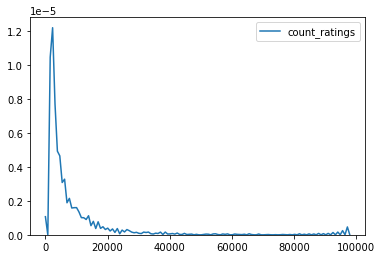

In [125]:
sns.kdeplot(movies3.count_ratings)

In [126]:
# On crée 7 catégories en fonction du nombre de votes.
# C'est une sorte de métrique de popularité.

def setRatingGroup(numberOfRatings):
    # if (numberOfRatings is None): return 0
    if (1 <= numberOfRatings <= 10): return 1
    elif (11 <= numberOfRatings <= 30): return 2
    elif (31 <= numberOfRatings <= 100): return 3
    elif (101 <= numberOfRatings <= 300): return 4
    elif (301 <= numberOfRatings <= 1000): return 5
    elif (1001 <= numberOfRatings): return 6
    else: return 0

In [127]:
movies3["rating_group"]=movies3.count_ratings.apply(setRatingGroup)


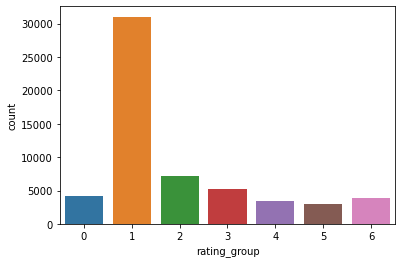

In [128]:
# Beaucoup de films avec entre 1 et 10 notes, mais ca a peu de sens de les séparer encore plus.

sns.countplot(x=movies3.rating_group)

In [129]:
# On enleve les colonnes qui ne servent plus.

movies4=movies3.drop(columns=["count_ratings","genre"])

In [130]:
movies4

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,av_rating,rating_group
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1995,3.886649,6
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1995,3.246583,6
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1995,3.173981,6
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1995,2.874540,6
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1995,3.077291,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,193876,The Great Glinka (1946),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1946,3.015764,0
58094,193878,Les tribulations d'une caissière (2011),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2011,3.078536,0
58095,193880,Her Name Was Mumu (2016),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,3.200000,0
58096,193882,Flora (2017),0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2017,3.000000,0


In [133]:
# On garde les colonnes movieId et title.
# On crée tags qui a True si le film est dans les genome_scores, False sinon.
# Ca sert pour savoir si on peut utiiser l'algo de Lucas.
# On crée une colonne title2 en enlevant l'année et en passant en lowercase.
# On utilisera cette colonne pour comparer à l'entree de l'utilisateur.

def removeyear(string):
    result=re.search(r'(\d{4})',string)
    if result:
        return string[:-6].strip()
    return string

movies5=movies4[["movieId","title"]]
movies5["tags"]=np.where(movies5.movieId.isin(genome_score.movieId.unique()),True,False)
movies5["title2"]=movies.title.apply(lambda x: removeyear(x.lower()))

In [138]:
movies5

,movieId,title,tags,title2
0,1,Toy Story (1995),True,toy story
1,2,Jumanji (1995),True,jumanji
2,3,Grumpier Old Men (1995),True,grumpier old men
3,4,Waiting to Exhale (1995),True,waiting to exhale
4,5,Father of the Bride Part II (1995),True,father of the bride part ii
...,...,...,...,...
58093,193876,The Great Glinka (1946),False,the great glinka
58094,193878,Les tribulations d'une caissière (2011),False,les tribulations d'une caissière
58095,193880,Her Name Was Mumu (2016),False,her name was mumu
58096,193882,Flora (2017),False,flora


In [139]:
# On sauvegarde ca.

movies5.to_csv("movies2.csv",index=False)

In [64]:
# On scale toutes les colonnes.

scaler=StandardScaler()
X=movies4.drop(columns=["movieId","title"])
y=movies4["movieId"]
X_scaled=scaler.fit_transform(X)

In [65]:
XX=pd.DataFrame(X_scaled,index=X.index,columns=X.columns)
XX

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,av_rating,rating_group
0,-0.281508,-0.374021,3.644890,4.562537,4.487118,1.625158,-0.310376,-0.310809,-0.843255,4.586050,...,-0.139755,-0.223879,-0.382405,-0.251027,-0.405843,-0.179832,-0.155868,0.162976,1.144448,2.456778
1,-0.281508,-0.374021,3.644890,-0.219176,4.487118,-0.615325,-0.310376,-0.310809,-0.843255,4.586050,...,-0.139755,-0.223879,-0.382405,-0.251027,-0.405843,-0.179832,-0.155868,0.162976,0.245943,2.456778
2,-0.281508,-0.374021,-0.274357,-0.219176,-0.222860,1.625158,-0.310376,-0.310809,-0.843255,-0.218053,...,-0.139755,-0.223879,2.615028,-0.251027,-0.405843,-0.179832,-0.155868,0.162976,0.144027,2.456778
3,-0.281508,-0.374021,-0.274357,-0.219176,-0.222860,1.625158,-0.310376,-0.310809,1.185880,-0.218053,...,-0.139755,-0.223879,2.615028,-0.251027,-0.405843,-0.179832,-0.155868,0.162976,-0.276319,2.456778
4,-0.281508,-0.374021,-0.274357,-0.219176,-0.222860,1.625158,-0.310376,-0.310809,-0.843255,-0.218053,...,-0.139755,-0.223879,-0.382405,-0.251027,-0.405843,-0.179832,-0.155868,0.162976,0.008296,2.456778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,3.552302,-0.374021,-0.274357,-0.219176,-0.222860,-0.615325,-0.310376,-0.310809,-0.843255,-0.218053,...,-0.139755,-0.223879,-0.382405,-0.251027,-0.405843,-0.179832,-0.155868,-1.544120,-0.078074,-1.191264
58094,-0.281508,-0.374021,-0.274357,-0.219176,-0.222860,1.625158,-0.310376,-0.310809,-0.843255,-0.218053,...,-0.139755,-0.223879,-0.382405,-0.251027,-0.405843,-0.179832,-0.155868,0.720396,0.010044,-1.191264
58095,-0.281508,-0.374021,-0.274357,-0.219176,-0.222860,-0.615325,-0.310376,-0.310809,1.185880,-0.218053,...,-0.139755,-0.223879,-0.382405,-0.251027,-0.405843,-0.179832,-0.155868,0.894589,0.180551,-1.191264
58096,-0.281508,-0.374021,3.644890,-0.219176,-0.222860,-0.615325,-0.310376,-0.310809,1.185880,-0.218053,...,-0.139755,-0.223879,-0.382405,3.983634,-0.405843,-0.179832,-0.155868,0.929428,-0.100203,-1.191264


In [66]:
# On fit un KNN pour avoir acces aux index des 10 voisins les plus proches.

modelKNN=KNeighborsClassifier(n_neighbors=10)
modelKNN.fit(XX,y)

KNeighborsClassifier(n_neighbors=10)

In [67]:
# La matrice de distances: 
#Chaque ligne représente un film, et dans chaque ligne il y a ses 10 plu proches voisins(lui compris).

sims=modelKNN.kneighbors(XX)[1]
sims

array([[    0,  3028,  4791, ..., 24657, 24734, 12226],
       [    1,    59,  2078, ..., 12292, 10965, 12692],
       [    2,   249,   234, ...,   546,  3524,   791],
       ...,
       [54369, 54256, 53889, ..., 54290, 54219, 54503],
       [58096, 49832, 28609, ..., 26395, 27507, 34448],
       [54147, 58097, 57564, ..., 54482, 55067, 55213]], dtype=int64)

In [68]:
SIMS=pd.DataFrame(sims,columns=["Voisin0","Voisin1","Voisin2","Voisin3","Voisin4","Voisin5","Voisin6","Voisin7","Voisin8","Voisin9"])

In [69]:
SIMS

,Voisin0,Voisin1,Voisin2,Voisin3,Voisin4,Voisin5,Voisin6,Voisin7,Voisin8,Voisin9
0,0,3028,4791,18403,3923,2210,10130,24657,24734,12226
1,1,59,2078,2010,4801,990,2315,12292,10965,12692
2,2,249,234,374,2340,1742,1491,546,3524,791
3,3,538,1805,6140,3734,193,8265,1420,2285,8286
4,4,815,2241,516,275,87,245,2112,1977,201
...,...,...,...,...,...,...,...,...,...,...
58093,58093,55412,55404,56127,55020,55022,55448,55917,55026,54782
58094,58094,54172,55567,58073,57399,55663,56595,54386,55584,54451
58095,54369,54256,53889,53973,54581,54244,54179,54290,54219,54503
58096,58096,49832,28609,19477,55997,44782,30077,26395,27507,34448


In [97]:
# On sauvegarde ce dataframe. C'est ce qu'on utilise pour faire des recommandations.

SIMS.to_csv("distances.csv",index=False)